### Improvements 
## IMP: Fitrar por la surface--remove events that move out of the surface on the first 3 secons
1) Remove blinks and interpolate values using cubic splines
2) Blank filtering of data---Done-- maibe explore other filter
3) Frequency analysis of the signal??
4) Remove trials with z scores over [2,-2]
5) Convert time to seconds
6) Open PLA file
7) Statistics of signal ¿How to compare surprise signals?
8) Amplitud, velocidad de cambio
9) Cut the whole signal of interest from the beggining
10) Fitrar por la surface

REfinements:
1) filter by surface
2) avoid experiments with a std too high
3) save images

### Simple pupillometry code to merge different experiments


In [81]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
import commons as cm
from data_curation import Normalization
# from pandasql import sqldf
import pupillometry_commons as cp
from itertools import compress
nm=Normalization()

session_location = Path(r"D:/sessions")
sessions=[]
df_list=[]
windows_s=3
seconds_norm=0.05
with open('session.txt','r') as f:
    for session in f:
            sessions.append(session.replace('\n',''))
f.close()

session_loc_list=[session_location.joinpath(session,'01 Processing_data','pupil_labs') for session in sessions ]
session_raw_list=[session_location.joinpath(session, '00 Raw_data','pupil_labs') for session in sessions ]

image_loc_list=[session_location.joinpath(session,'images_order') for session in sessions ]

for subject, recording_location in zip(sessions,session_loc_list):
    recording_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    print(recording_folder)
    index_aux = list(map(lambda x: not('_' in x), recording_folder))
    recording_folder=list(compress(recording_folder,index_aux))
    #Load data in folders
    if len(recording_folder)>1:
        ValueError('Ambiguty in folder of experiment')
    recording_location=recording_location.joinpath(recording_folder[0],'exports')
    recording_location_raw=recording_location.joinpath(recording_folder[0],'exports')
    export_folder=[record for record in os.listdir(recording_location)  if '00' in record]
    if len(export_folder)>1:
        ValueError('Ambiguty in folder of exports')
    recording_location=recording_location.joinpath(export_folder[0])

    gaze_surf_csv=[record for record in os.listdir(recording_location.joinpath('surfaces'))  if 'gaze_positions' in record][0]

    print(f'Analixing session: {subject}')

    exported_pupil_csv = recording_location.joinpath('pupil_positions.csv')
    pupil_pd_frame = pd.read_csv(exported_pupil_csv)
    exported_gaze_csv = os.path.join(recording_location,'gaze_positions.csv')
    gaze_pd_frame = pd.read_csv(exported_gaze_csv)
    annotations_csv = os.path.join(recording_location,'annotations.csv')
    annotations_pd = pd.read_csv(annotations_csv)
    surface_gaze_csv = os.path.join(recording_location, 'surfaces',gaze_surf_csv)
    surfaces_pd_frame = pd.read_csv(surface_gaze_csv)

    #Execute analysis
    df=cp.calculate_pupillometry(pupil_pd_frame,annotations_pd,recording_location,
                                 window_s=windows_s,
                                 seconds_norm=seconds_norm,
                                 signal_str='diameter_3d_cubic_z_score')
    df['session']=subject
    df_list.append(df)

['ES0001_S005_Script.txt', '006']
Analixing session: ES0001_S005_PC_EM


,index,timestamp,label,duration
0,6736,13058.92485,blank_0,NaN


index                  22873
timestamp        13599.66347
label        EndOfExperiment
duration                 NaN
Name: 162, dtype: object

c:\Users\Bolo\Desktop\Laboratorio\incipit\analysis\test\vision_ejes\analysis\pupillometry\pupillometry_commons.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_pd_frame['on_surf']=True
c:\Users\Bolo\Desktop\Laboratorio\incipit\analysis\test\vision_ejes\analysis\pupillometry\pupillometry_commons.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
c:\Users\Bolo\Desktop\Laboratorio\incipit\analysis\test\vision_ejes\analy

sampling frequency for right eye is 123.93212452766575
sampling frequency for left eye is 123.93023048885034
Total blinks time left 166.11s and right 103.05s of a total of 540.73s left and 540.73s right
Total blinks time left 30.72% 
Total blinks time right 19.06% 
Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 372 correspond to 3s


### Lets plot the figures

In [82]:
df_concat=pd.concat(df_list)
df_concat.index.name='index1'
df_concat_group=df_concat.groupby('index1')
df_concat['session'].unique()


array(['ES0001_S005_PC_EM'], dtype=object)

In [83]:
window_frames=df_concat.index.max()+1#np.round(windows_s*120).astype(int)
window=range(0,window_frames)
time_x=np.linspace(0,windows_s,window_frames)

C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\3739608675.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_mean=df_concat_group.mean()
C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\3739608675.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_concat_std=df_concat_group.std()
c:\Users\Bolo\.conda\envs\bayes\Lib\site-packages\matplotlib\axes\_base.py:2532: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


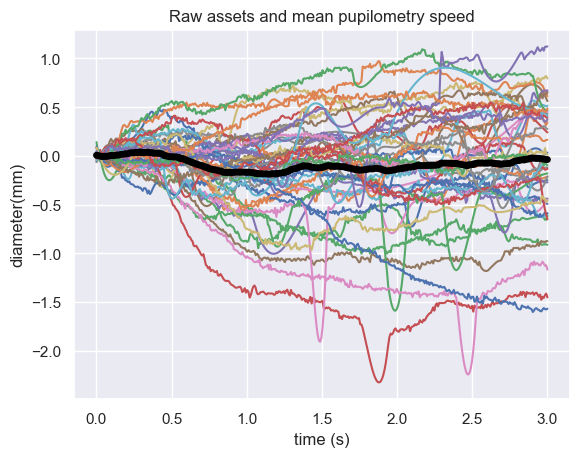

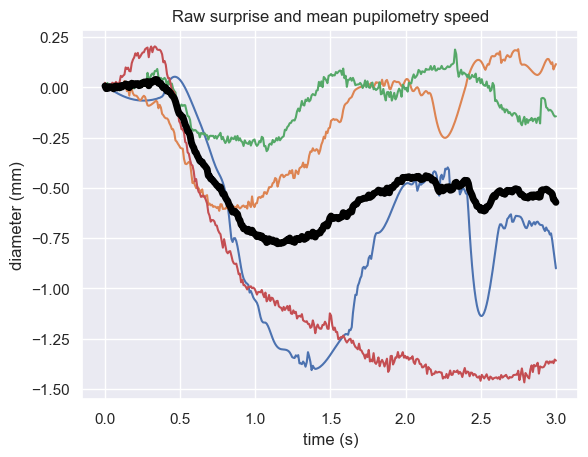

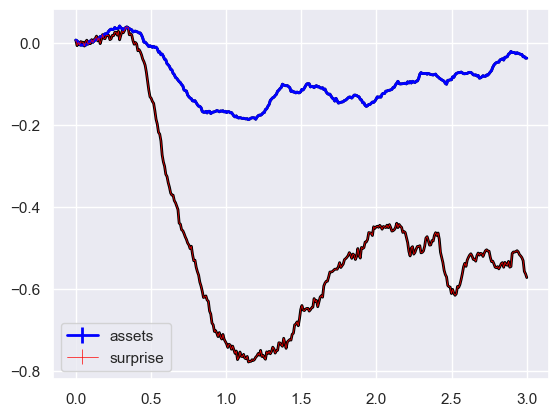

In [84]:
%matplotlib inline
df_concat_mean=df_concat_group.mean()
df_concat_std=df_concat_group.std()

filter_assets=list(df_concat_mean.columns)
filter_surprise=list(df_concat_mean.columns)

filter_assets=[asset for asset in filter_assets if 'Asset' in asset ]
filter_surprise=[asset for asset in filter_surprise if 'Surprise' in asset ]

mat=df_concat_mean.reindex(columns=filter_assets).values
mat_std=df_concat_std.reindex(columns=filter_assets).values

mat2=df_concat_mean.reindex(columns= filter_surprise).values
mat2_std=df_concat_std.reindex(columns= filter_surprise).values

fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat)
ax.plot(time_x,np.mean(mat,axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,mat2)
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.errorbar(time_x,np.mean(mat,axis=1),np.std(mat_std,axis=1),linewidth=2,color='blue')
ax.errorbar(time_x,np.mean(mat2,axis=1),np.std(mat2_std,axis=1),linewidth=0.5,color='red')
ax.legend(['assets','surprise'])
ax.plot(time_x,np.mean(mat2,axis=1),linewidth=2,color='black')
ax.plot(time_x,np.mean(mat,axis=1),linewidth=2,color='black')


In [85]:
pupil_events_speed=np.abs(np.diff(mat))
pupil_surprise_speed=np.abs(np.diff(mat2))

Text(0, 0.5, 'speed (s)')

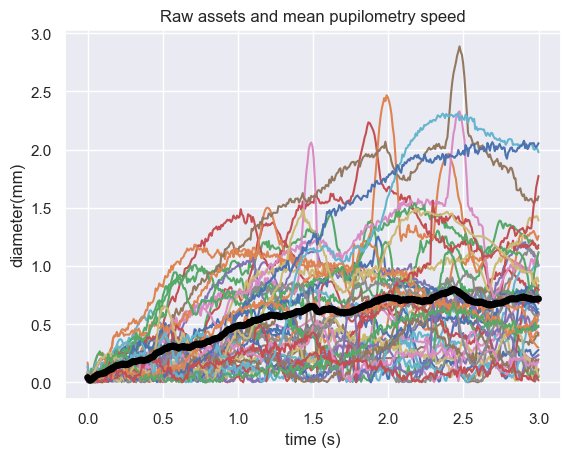

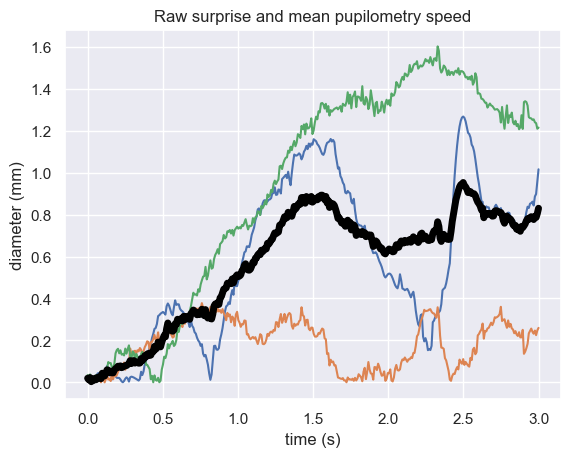

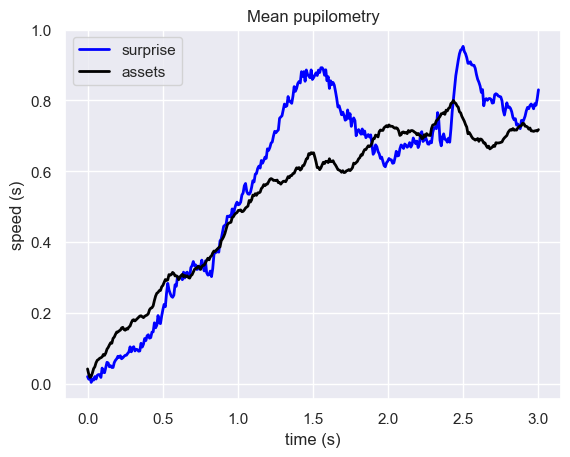

In [86]:
%matplotlib inline

pupil_events_speed
pupil_surprise_speed

fig, ax=plt.subplots(1,1)
ax.plot(time_x,pupil_events_speed[window])
ax.plot(time_x,np.mean(pupil_events_speed[window,:],axis=1),linewidth=5,color='black')
# ax.legend([images,'assets mean'])
ax.set_title('Raw assets and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter(mm)')

fig, ax=plt.subplots(1,1)
ax.plot(time_x,pupil_surprise_speed[window,:])
ax.plot(time_x,np.mean(pupil_surprise_speed[window,:],axis=1),linewidth=5,color='black')
ax.set_title('Raw surprise and mean pupilometry speed')
ax.set_xlabel('time (s)')
ax.set_ylabel('diameter (mm)')


fig, ax=plt.subplots(1,1)
ax.plot(time_x,np.mean(pupil_surprise_speed[window,:],axis=1),linewidth=2,color='blue')
ax.plot(time_x,np.mean(pupil_events_speed[window,:],axis=1),linewidth=2,color='black')

ax.legend(['surprise','assets'])
ax.set_title('Mean pupilometry')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (s)')

In [87]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 
filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')
time_x=np.linspace(0,2,248)
event=annotations_pd.loc[filter_events,['label']].values.flatten()
events=[image.split('.')[0] for image in event]
events

['Asset0018',
 'Asset0015',
 'Asset0034',
 'Asset0040',
 'Asset0014',
 'Asset0016',
 'Asset0041',
 'Surprise01',
 'Asset0001',
 'Asset0043',
 'Asset0044',
 'Asset0028',
 'Asset0005',
 'Asset0026',
 'Asset0048',
 'Asset0033',
 'Asset0035',
 'Surprise02',
 'Asset0049',
 'Asset0017',
 'Asset0008',
 'Asset0036',
 'Asset0030',
 'Asset0032',
 'Asset0007',
 'Asset0029',
 'Surprise03',
 'Asset0031',
 'Asset0006',
 'Asset0050',
 'Asset0047',
 'Asset0046',
 'Asset0011',
 'Asset0021',
 'Asset0024',
 'Asset0039',
 'Asset0004',
 'Surprise04',
 'Asset0010',
 'Asset0003',
 'Asset0037',
 'Asset0020',
 'Asset0012',
 'Asset0022',
 'Asset0002',
 'Asset0045',
 'Asset0009',
 'Asset0042',
 'Asset0027']

### Filter data that is inside the surface
#### Due to the fact that te gaze timesatmp of the surface is obtained by combining data from both pupils we cant just merge by the timestamp. We have to read and duplicate values

In [88]:
# pupil_pd_frame['join_index']=np.nan
# surfaces_pd_frame['join_index']=np.nan


In [89]:
# pupil_list=[]
# surface_list=[]
# ref_col_gaze=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]
# ref_col_index=surfaces_pd_frame.columns.get_indexer(['join_index'])[0]

# timestamps=pupil_pd_frame['pupil_timestamp'].values

# for row in range(surfaces_pd_frame.shape[0]-1):
#         ini_value=surfaces_pd_frame.iloc[row,ref_col_gaze]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col_gaze]
#         # print(ini_value,end_value)
#         index_1=(timestamps>=ini_value)&(timestamps< end_value)
          
#         pupil_pd_frame.loc[index_1,['join_index']]=row
#         surfaces_pd_frame.iloc[row,ref_col_index]=row
# final_df=pd.merge(pupil_pd_frame, surfaces_pd_frame, on="join_index", how="left",suffixes=['','_sur'])
# final_df.head()


In [90]:
# surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
# surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
# surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
# surfaces_pd_frame
# df= pd.merge_asof(pupil_pd_frame, surfaces_pd_frame, left_on='pupil_timestamp', right_on='start', direction='forward',suffixes=['','_sur'])
# df = df[df['pupil_timestamp'] <= df['end']]
# pupil_pd_frame=df

### Cut all data by annotations of interest

In [91]:
# pupil_pd_frame=final_df

from IPython.display import display

event_initial=annotations_pd['label'].values[0]
event_final=annotations_pd['label'].values[-1]

initial_anotation,_,_=cm.extract_annotations_timestamps(event_initial,'label',annotations_pd)
end_anotation=annotations_pd.iloc[-1]
display(initial_anotation)
display(end_anotation)

pupil_pd_frame=cm.filter_rows_by_temporal_values(
         dataframe=pupil_pd_frame,
         time_column='pupil_timestamp',
         ini_value=initial_anotation['timestamp'].values[0],
         end_value=end_anotation['timestamp']
         )

,index,timestamp,label,duration,timestamp_s
0,6736,13058.92485,blank_0,NaN,0.0


index                    22873
timestamp          13599.66347
label          EndOfExperiment
duration                   NaN
timestamp_s          540.73862
Name: 162, dtype: object

## Extract the data
Extracting pupil 3d data for analysis

In [92]:
from IPython.display import display
pupil_pd_frame['on_surf']=True
confidence_thr=1
 
# filter for 3d data
detector_3d_data = pupil_pd_frame[pupil_pd_frame.method == 'pye3d 0.3.0 real-time']

pupil_left_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_interpolated=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0)& (pupil_pd_frame['on_surf']==True)]

left_conf_index=(pupil_left_eye_interpolated['confidence']>=confidence_thr).values
right_conf_index=(pupil_right_eye_interpolated['confidence']>=confidence_thr).values

pupil_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)]
pupil_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)]

blinks_left_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)]
blinks_right_eye=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

pupil_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]
pupil_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

blinks_left_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]
blinks_right_eye_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==0) & (pupil_pd_frame['confidence']< confidence_thr)& (pupil_pd_frame['on_surf']==True)]

out_surface=detector_3d_data.loc[(pupil_pd_frame['eye_id']==1) & (pupil_pd_frame['confidence']>=confidence_thr)& (pupil_pd_frame['on_surf']==True)]

In [93]:
pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_left_eye_interpolated.loc[left_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_left_eye_interpolated.loc[left_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_left_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )

pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
                                                x=pupil_right_eye_interpolated.loc[right_conf_index,['pupil_timestamp']].values.flatten(),
                                                y= pupil_right_eye_interpolated.loc[right_conf_index,['diameter_3d']].values.flatten(),
                                                x_interpolate=pupil_right_eye_interpolated['pupil_timestamp'].values.flatten()
                                                )


filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 
filter_events_all=~annotations_pd['label'].str.contains('EndOfExperiment') 


filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')

print("eye0 (right eye) data:")
display(pupil_right_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))

print("eye1 data (left eye) data:")
display(pupil_left_eye[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter_3d']].head(10))


eye0 (right eye) data:


C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\1084852889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(
C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\1084852889.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic']=cm.cubic_siplne_interpolation(


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
40776,13058.927290,0,1.0,0.485316,0.418614,3.977882
40781,13058.935264,0,1.0,0.485276,0.418809,3.977099
40785,13058.943270,0,1.0,0.484928,0.418454,3.978508
40789,13058.951245,0,1.0,0.485426,0.418196,3.980086
40793,13058.959246,0,1.0,0.485440,0.418731,3.974571
40797,13058.967279,0,1.0,0.485261,0.418267,3.969203
40801,13058.975271,0,1.0,0.485669,0.418401,3.974176
40804,13058.983267,0,1.0,0.485604,0.418370,3.953271
40807,13058.991122,0,1.0,0.485446,0.418666,3.951038
40810,13058.999143,0,1.0,0.485145,0.418349,3.947132


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter_3d
40774,13058.927111,1,1.0,0.455756,0.568311,4.552916
40779,13058.935122,1,1.0,0.455942,0.568305,4.549833
40782,13058.943131,1,1.0,0.455797,0.568380,4.548611
40786,13058.951115,1,1.0,0.455780,0.568139,4.535508
40790,13058.959135,1,1.0,0.455926,0.568205,4.536191
40795,13058.967133,1,1.0,0.455920,0.567763,4.536211
40800,13058.975271,1,1.0,0.455933,0.567842,4.532886
40802,13058.983267,1,1.0,0.455966,0.567776,4.533625
40808,13058.991244,1,1.0,0.456024,0.567960,4.528622
40813,13058.999266,1,1.0,0.456251,0.568305,4.495131


df to analyse


In [94]:
pupil_left_eye=pupil_left_eye
pupil_right_eye=pupil_right_eye

blinks_left_eye=blinks_left_eye
blinks_right_eye=blinks_right_eye

In [95]:
recording_location
parts = list(recording_location.parts)
parts=parts[0:-2]
parts=Path(*parts)
parts

WindowsPath('D:/sessions/ES0001_S005_PC_EM/01 Processing_data/pupil_labs/006')

In [96]:
import json
f = open(parts.joinpath('info.player.json'))
data = json.load(f)
time_whole_recording=data['duration_s']
time_roi_left=abs(pupil_left_eye['pupil_timestamp'].values[-1]-pupil_left_eye['pupil_timestamp'].values[0])
time_roi_right=abs(pupil_right_eye['pupil_timestamp'].values[-1]-pupil_right_eye['pupil_timestamp'].values[0])

pupil_sampling_freq_left=(pupil_left_eye.shape[0]+blinks_left_eye.shape[0])/time_roi_left
pupil_sampling_freq_right=(pupil_right_eye.shape[0]+blinks_right_eye.shape[0])/time_roi_right 
print('sampling frequency for right eye is {}'.format(pupil_sampling_freq_right)) 
print('sampling frequency for left eye is {}'.format(pupil_sampling_freq_left)) 

# Closing file
f.close()


sampling frequency for right eye is 123.93212452766575
sampling frequency for left eye is 123.93023048885034


##  Explore blinks and Asses data quality, are there many regions with data gaps? 


### Asses data quality

In [97]:
total_blinks_left=blinks_left_eye.shape[0]/pupil_sampling_freq_left
total_blinks_right=blinks_right_eye.shape[0]/pupil_sampling_freq_right
print(f'Total blinks time left {total_blinks_left:.2f}s and right {total_blinks_right:.2f}s of a total of {time_roi_left:.2f}s left and {time_roi_right:.2f}s right')
print(f'Total blinks time left {total_blinks_left/time_roi_left:.2%} ')
print(f'Total blinks time right {total_blinks_right/time_roi_right:.2%} ')


Total blinks time left 166.11s and right 103.05s of a total of 540.73s left and 540.73s right
Total blinks time left 30.72% 
Total blinks time right 19.06% 


## Put timestamp data in seconds


In [98]:
pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
pupil_left_eye['timestamp_s']

pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]
pupil_right_eye['timestamp_s']

annotations_pd['timestamp_s']=annotations_pd['timestamp']-annotations_pd['timestamp'].values[0]


C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\2321012662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye['timestamp_s']=pupil_left_eye['pupil_timestamp']-pupil_left_eye['pupil_timestamp'].values[0]
C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\2321012662.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye['timestamp_s']=pupil_right_eye['pupil_timestamp']-pupil_right_eye['pupil_timestamp'].values[0]


### View Raw data

Text(0.5, 1.0, 'Both eyes')

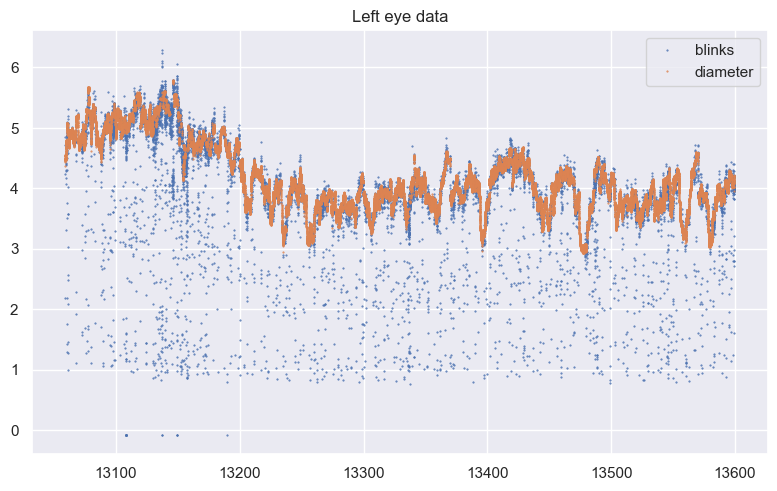

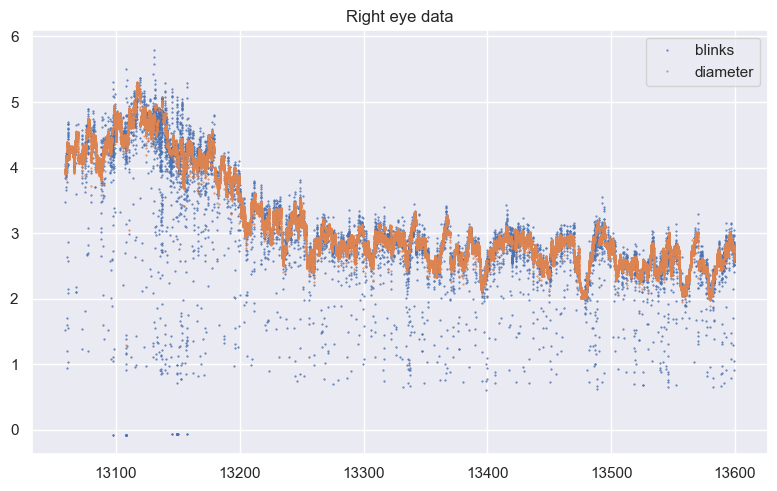

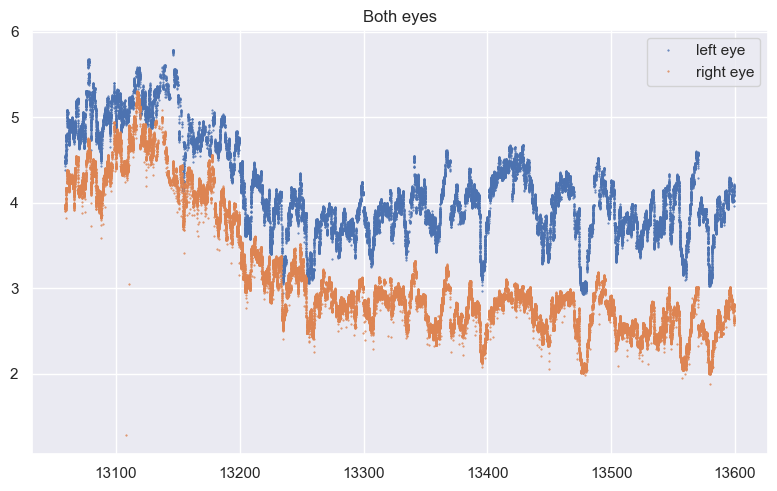

In [99]:
%matplotlib inline
#for left eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_left_eye['pupil_timestamp'],blinks_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Left eye data')

#for right eye
fig, ax=plt.subplots(1,1)
ax.plot(blinks_right_eye['pupil_timestamp'],blinks_right_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['blinks','diameter'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Right eye data')

fig, ax=plt.subplots(1,1)
ax.plot(pupil_left_eye['pupil_timestamp'],pupil_left_eye['diameter_3d'],'.',markersize=1)
ax.plot(pupil_right_eye['pupil_timestamp'],pupil_right_eye['diameter_3d'],'.',markersize=1)
ax.legend(['left eye','right eye'])    
fig.set_size_inches((9.5, 5.5))
ax.set_title('Both eyes')



### Do cubic splines aeasily, in the future use a better blink detection algorithm

In [100]:
%matplotlib qt


fig, ax = plt.subplots(2,1,figsize=(15, 8))
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d'], 'o', label='data')
ax[0].plot(pupil_left_eye_interpolated['pupil_timestamp'], pupil_left_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[0].legend(loc='lower right', ncol=2)
ax[0].set_title('left eye')
ax[0].set_xlabel('sample')
ax[0].set_ylabel('diameter (mm)')


ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d'], 'o', label='data')
ax[1].plot(pupil_right_eye_interpolated['pupil_timestamp'], pupil_right_eye_interpolated['diameter_3d_cubic'],'.', label="interpolated")
ax[1].legend(loc='lower right', ncol=2)
ax[1].set_title('right eye')
ax[1].set_xlabel('sample')
ax[1].set_ylabel('diameter (mm)')
fig.tight_layout()

usaing smooting splines

## 

In [101]:
time_col_str='timestamp_s'
signal_str='diameter_3d'
sns.set_theme()

%matplotlib qt
fig1, ax=plt.subplots(1,)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig1.set_size_inches((18, 5.5))

fig2, ax=plt.subplots(1)
ax.plot(pupil_left_eye[time_col_str],pupil_left_eye[signal_str],'.')
for  index, row in annotations_pd[filter_events_surprise].iterrows():
    plt.axvline(row[time_col_str], color='r', label='axvline - full height')
    ax.text((row[time_col_str]),3,row['label'])
ax.set_title('pupil diameter and events')    
ax.set_xlabel(f'{time_col_str}')
ax.set_ylabel(f'{signal_str}')
fig2.set_size_inches((18, 5.5))

# plt.tight_layout()

## Apply normalizations


### Create different normalization columns

In [102]:
pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
                                            type='z_score')

pupil_left_eye['diameter_3d_z_score']=nm.normalize(values=pupil_left_eye['diameter_3d'],
                                            type='z_score')

pupil_right_eye['diameter_3d_z_score']=nm.normalize(values=pupil_right_eye['diameter_3d'],
                                            type='z_score')
pupil_left_eye.head()

C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\2016220940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_left_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_left_eye_interpolated['diameter_3d_cubic'],
C:\Users\Bolo\AppData\Local\Temp\ipykernel_6432\2016220940.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pupil_right_eye_interpolated['diameter_3d_cubic_z_score']=nm.normalize(values=pupil_right_eye_interpolated['diameter_3d_cubic'],
C:\Users\Bolo\AppData\Local\Temp\i

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle,on_surf,timestamp_s,diameter_3d_z_score
40774,13058.927111,6736,1,1.0,0.455756,0.568311,43.270485,pye3d 0.3.0 real-time,87.505220,82.884232,...,1.899777,-2.222166,129.813365,112.236642,168.589527,168.589527,0.0,True,0.000000,0.822418
40779,13058.935122,6736,1,1.0,0.455942,0.568305,43.242890,pye3d 0.3.0 real-time,87.540840,82.885365,...,1.900291,-2.221025,129.813365,112.236642,168.589527,168.589527,0.0,True,0.008011,0.816796
40782,13058.943131,6736,1,1.0,0.455797,0.568380,43.231728,pye3d 0.3.0 real-time,87.513074,82.871093,...,1.900690,-2.222211,129.813365,112.236642,168.589527,168.589527,0.0,True,0.016020,0.814566
40786,13058.951115,6736,1,1.0,0.455780,0.568139,43.110981,pye3d 0.3.0 real-time,87.509847,82.917266,...,1.901320,-2.221369,129.813365,112.236642,168.589527,168.589527,0.0,True,0.024004,0.790666
40790,13058.959135,6737,1,1.0,0.455926,0.568205,43.124003,pye3d 0.3.0 real-time,87.537787,82.904587,...,1.902071,-2.222821,129.813365,112.236642,168.589527,168.589527,0.0,True,0.032024,0.791911


### Filters

In [103]:
filter_events=annotations_pd['label'].str.contains('Asset') | annotations_pd['label'].str.contains('Control') | annotations_pd['label'].str.contains('Surprise')
filter_assets=annotations_pd['label'].str.contains('Asset') 

filter_events_surprise= annotations_pd['label'].str.contains('Surprise')
filter_events_blank= annotations_pd['label'].str.contains('blank')


### Asset normalization

In [104]:
#common variables for analysis
pupil_df=pupil_left_eye
signal_str='diameter_3d_z_score'
secons_norm=0.05 # preestimulus frame to normalize
window_s=2.7  # winsow of interest 

# pupil_df['speed']=abs(pupil_df['diameter_3d'].diff(periods=100).rolling(3).median())

frames_norm=np.round(secons_norm*pupil_sampling_freq_left).astype(int)
win_norm=range(frames_norm)
print('Initial frames used for normalization = {} correspond to {}s'.format(frames_norm,secons_norm))

window_frames=np.round(window_s*pupil_sampling_freq_left).astype(int)
print('Windows frames of interest   = {} correspond to {}s'.format(window_frames,window_s))
window=range(0,window_frames)
time_x=np.linspace(0,window_s,window_frames)



Initial frames used for normalization = 6 correspond to 0.05s
Windows frames of interest   = 335 correspond to 2.7s


In [105]:
# For Assets only window size data
event=annotations_pd.loc[filter_events,['label']].values.flatten()
# event=annotations_pd['label'].values.flatten()
data_dict=dict([(key,[None]) for key in event])# dict with empty keys 

pupil_diameter_df=pd.DataFrame()#pd.DataFrame(data_dict,index=np.arange(0,800))
data_list=[]
for num,im in enumerate(event):
    initial_anotation,end_anotation,index_annotation=cm.extract_annotations_timestamps(im,'label',annotations_pd)
    segmented_df=cm.filter_rows_by_temporal_values(
        dataframe=pupil_df,
        time_column='pupil_timestamp',
        ini_value=initial_anotation['timestamp'].values[0],
        end_value=end_anotation['timestamp'].values[0]
        )
    
    segmented_df=segmented_df.iloc[window]
    win_blank=segmented_df.iloc[win_norm]
    asset_norm=segmented_df[signal_str]-win_blank[signal_str].mean()
    asset_raw=segmented_df[signal_str]
    data_dict[im]=asset_norm.values
pupil_diameter_df=pd.DataFrame(data_dict)


IndexError: positional indexers are out-of-bounds

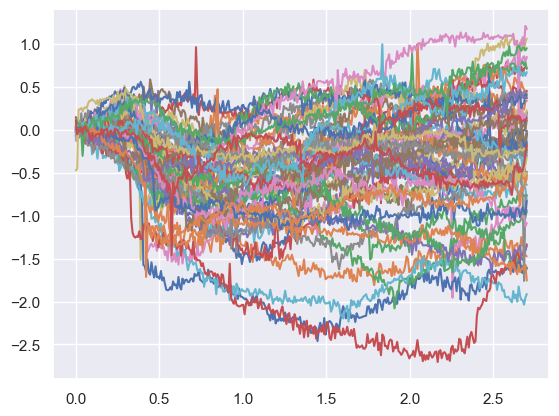

In [ ]:
%matplotlib inline
df_plot=pupil_diameter_df
plt.plot(time_x,df_plot)


### With thius new data format i can easily filter out assets with z_scores higher than 2

In [ ]:
pupil_diameter_df.describe()

,Asset0020.tif,Asset0022.tif,Asset0042.tif,Asset0039.tif,Asset0001.tif,Asset0021.tif,Asset0048.tif,Asset0005.tif,Asset0028.tif,Surprise03.tif,...,Asset0040.tif,Asset0002.tif,Asset0015.tif,Control01.tif,Asset0004.tif,Control05.tif,Asset0014.tif,Asset0034.tif,Asset0027.tif,Asset0008.tif
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,...,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,-0.619399,-1.189708,-0.500206,-0.062560,-0.124600,-0.476659,-0.816904,-0.210833,-0.429588,-0.537979,...,-0.195006,-0.246717,-0.627325,-0.192243,-0.118770,0.079400,-0.823825,-0.791488,0.270638,-0.329643
std,0.445768,0.567604,0.295163,0.431519,0.270794,0.411371,0.495136,0.295022,0.351194,0.402241,...,0.236999,0.181820,0.296898,0.117848,0.214245,0.381124,0.334264,0.301815,0.293498,0.226010
min,-1.564844,-1.809405,-1.041851,-0.681403,-0.663003,-1.134513,-1.955656,-1.433265,-1.514890,-1.316442,...,-0.669815,-0.586381,-1.154332,-0.423704,-0.476673,-0.646665,-1.169232,-1.337795,-0.305012,-1.462550
25%,-0.965263,-1.579010,-0.729833,-0.463354,-0.342066,-0.806136,-1.175780,-0.314750,-0.724641,-0.798201,...,-0.361134,-0.375513,-0.847649,-0.283907,-0.265415,-0.232246,-1.017844,-0.966885,0.052160,-0.519456
50%,-0.538937,-1.391913,-0.599326,-0.082536,-0.129419,-0.559442,-0.885778,-0.121708,-0.520194,-0.521215,...,-0.276673,-0.284555,-0.658193,-0.209324,-0.209773,0.078046,-0.956913,-0.858630,0.229272,-0.296887
75%,-0.310350,-1.193324,-0.265908,0.264190,0.078896,-0.167442,-0.608737,-0.040565,-0.109503,-0.246060,...,-0.022911,-0.091984,-0.561045,-0.111788,-0.058879,0.403609,-0.853424,-0.720419,0.437793,-0.116745
max,0.202968,0.135513,0.089761,0.788192,0.449972,0.401365,0.468673,0.260796,0.236523,0.158230,...,0.465724,0.127124,0.055216,0.107699,0.473033,0.992642,0.037429,0.058996,0.976853,0.103034


### Do the plots

In [ ]:
np.median(pupil_diameter_df,axis=1)

array([-0.00644708, -0.01162995,  0.01004654,  0.013939  , -0.00132749,
        0.01284928,  0.01042244,  0.02557685,  0.0060373 ,  0.00199074,
        0.00758345, -0.00078361,  0.00856573,  0.01179544,  0.00686461,
        0.02177007,  0.0086927 ,  0.02295417,  0.01293146,  0.03319526,
        0.0341108 ,  0.03015443,  0.03280223,  0.04632664,  0.02820775,
        0.02962146,  0.04183836,  0.05780554,  0.03322049,  0.02183326,
        0.03344332,  0.03038529,  0.01613709,  0.03608243,  0.04115143,
        0.01159517,  0.02812577,  0.02096337,  0.00717018,  0.0062911 ,
        0.01156396,  0.02082431,  0.00451556,  0.00414607, -0.02098274,
       -0.03435314, -0.03143934, -0.03788769, -0.09340026, -0.0982982 ,
       -0.16415238, -0.16479416, -0.19614943, -0.2027069 , -0.21497201,
       -0.26100972, -0.27293642, -0.30479571, -0.303274  , -0.32586099,
       -0.36276334, -0.37346509, -0.40320863, -0.39495567, -0.43535695,
       -0.43014113, -0.46665016, -0.47673222, -0.47994841, -0.48

In [ ]:

mat=pupil_diameter_df.reindex(columns=
                                  even_asset).values
mat[window]


NameError: name 'even_asset' is not defined

## Now lets calculate the speed of change from the normalized data

Exclude data that is over [2,-2] z scores


NameError: name 'pupil_zscore' is not defined

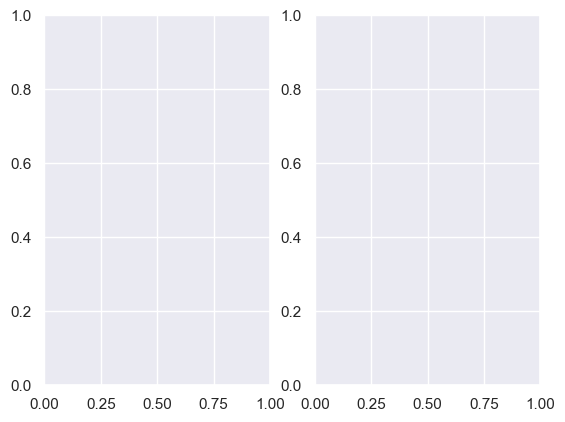

In [ ]:
fig,ax=plt.subplots(1,2)
sns.histplot(pupil_zscore[window,6],ax=ax[0])
sns.histplot(pupil_events_matrix[window,6],ax=ax[1])

In [ ]:
#test sfuntion
sigma=1
mu=10
data_normal=sigma*np.random.randn(70,100) +mu
data_norm=nm.normalize(values=data_normal.reshape(data_normal.size),
                                            type='z_score').reshape(data_normal.shape)
plt.plot(data_normal,'.',color='red')
plt.plot(data_norm,'.',color='blue')
plt.plot(data_normal-10,'.',color='green')


In [ ]:
plt.hist(data_normal)


In [ ]:
pupil_events_matrix.shape[0]

In [ ]:
r=a.reshape(pupil_events_matrix.shape)

In [ ]:
pupil_events_matrix.shape[0]*pupil_events_matrix.shape[1]

In [ ]:
pupil_events_matrix.shape

In [ ]:
# pupil_list=[]
# surface_list=[]
# ref_col=surfaces_pd_frame.columns.get_indexer(['gaze_timestamp'])[0]

# for row in range(20,200):#(surfaces_pd_frame.shape[0]-1):
#         ini_val=surfaces_pd_frame.iloc[row,ref_col]
#         end_value=surfaces_pd_frame.iloc[row+1,ref_col]
#         surface_row=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )
#         aux_pd_frame.insert(0,'horizontal_index',row)
#         surface_row.insert(0,'horizontal_index',row)
#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffisx='sur_',how='cross')

#         pupil_list.append(aux_pd_frame)
#         surface_list.append(surface_row)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)
        
# vert_stack=pd.concat(pupil_list,axis=0)
# horz_stack=pd.concat(surface_list,axis=0)
# vert_stack.head()
# final_df=[]
# for row,index in surfaces_pd_frame.iterrows():
#         ini_val=surfaces_pd_frame.iloc[row]['gaze_timestamp']
#         end_value=surfaces_pd_frame.iloc[row+1]['gaze_timestamp']
#         to_join=surfaces_pd_frame.iloc[row:row+1]
#         # print(ini_val,end_value)
#         aux_pd_frame=cm.filter_rows_by_temporal_values(
#                 dataframe=pupil_pd_frame,
#                 time_column='pupil_timestamp',
#                 ini_value=ini_val,
#                 end_value=end_value
#                 )

#         # aux_pd_frame=aux_pd_frame.join(to_join,rsuffix='sur_',how='cross')
#         final_df.append(aux_pd_frame)
# # final_df=pd.concat(final_df,axis=0)
# # display(final_df)


In [ ]:
df_A = pd.DataFrame({'start_date':['2017-03-27','2017-01-10'],'end_date':['2017-04-20','2017-02-01']})
df_B = pd.DataFrame({'event_date':['2017-01-20','2017-01-27'],'price':[100,200]})

df_A['end_date'] = pd.to_datetime(df_A.end_date)
df_A['start_date'] = pd.to_datetime(df_A.start_date)
df_B['event_date'] = pd.to_datetime(df_B.event_date)
df_B

,event_date,price
0,2017-01-20,100
1,2017-01-27,200


In [ ]:
df_merge = df_A.merge(df_B, how='cross')
df_merge

,start_date,end_date,event_date,price
0,2017-03-27,2017-04-20,2017-01-20,100
1,2017-03-27,2017-04-20,2017-01-27,200
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
df_merge = df_merge.query('event_date >= start_date and event_date <= end_date')
df_merge

,start_date,end_date,event_date,price
2,2017-01-10,2017-02-01,2017-01-20,100
3,2017-01-10,2017-02-01,2017-01-27,200


In [ ]:
surfaces_pd_frame['start']=surfaces_pd_frame['gaze_timestamp']
surfaces_pd_frame['end']=np.append(surfaces_pd_frame['gaze_timestamp'].values[1:],0)
surfaces_pd_frame.drop(surfaces_pd_frame.tail(1).index,inplace=True)
surfaces_pd_frame['event']=np.arange(len(surfaces_pd_frame))
# idx = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'], df_2['end'], closed='both')

In [ ]:
surfaces_pd_frame.index = pd.IntervalIndex.from_arrays(surfaces_pd_frame['start'],surfaces_pd_frame['end'],closed='both')
surfaces_pd_frame

,world_timestamp,world_index,gaze_timestamp,x_norm,y_norm,x_scaled,y_scaled,on_surf,confidence,start,end,event
"[14963.464168400002, 14963.468149400003]",14963.529049,0,14963.464168,0.390105,-0.042263,0.390105,-0.042263,False,0.990000,14963.464168,14963.468149,0
"[14963.468149400003, 14963.472153400002]",14963.529049,0,14963.468149,0.385552,-0.102956,0.385552,-0.102956,False,0.990000,14963.468149,14963.472153,1
"[14963.472153400002, 14963.476132400005]",14963.529049,0,14963.472153,0.379080,-0.151352,0.379080,-0.151352,False,0.990000,14963.472153,14963.476132,2
"[14963.476132400005, 14963.4801314]",14963.529049,0,14963.476132,0.373581,-0.219004,0.373581,-0.219004,False,0.990000,14963.476132,14963.480131,3
"[14963.4801314, 14963.4841224]",14963.529049,0,14963.480131,0.366127,-0.282971,0.366127,-0.282971,False,0.990000,14963.480131,14963.484122,4
...,...,...,...,...,...,...,...,...,...,...,...,...
"[15616.681685400004, 15616.685702400002]",15616.684612,38927,15616.681685,0.353888,0.368990,0.353888,0.368990,True,0.918658,15616.681685,15616.685702,159420
"[15616.685702400002, 15616.6896554]",15616.684612,38927,15616.685702,0.333188,0.345879,0.333188,0.345879,True,0.937488,15616.685702,15616.689655,159421
"[15616.6896554, 15616.693664400002]",15616.684612,38927,15616.689655,0.321895,0.354199,0.321895,0.354199,True,0.937488,15616.689655,15616.693664,159422
"[15616.693664400002, 15616.697709400005]",15616.700605,38928,15616.693664,0.296020,0.369735,0.296020,0.369735,True,0.913507,15616.693664,15616.697709,159423


In [ ]:
pupil_pd_frame['event'] = pupil_pd_frame['pupil_timestamp'].apply(lambda x : surfaces_pd_frame.iloc[surfaces_pd_frame.index.get_loc(x)]['event'])

KeyError: 15616.703703400002